In [1]:
import pandas as pd
from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz
import matplotlib.pyplot as plt

import seaborn as sb

In [2]:
leiden_dpt_order = ['5', '3', '9', '2', '7', '12', '4', '6', '8', '1', '0', '10', '11']

In [3]:
path_rev = '../../figures/dextramer/revision_plan/'
DPI = 600

# 2G

In [25]:
path_2g = '../../results/dextramer/CD8/revision/fig2G_scCoda.csv'
df_2g = pd.read_csv(path_2g, index_col=0)
print(len(df_2g))
df_2g = df_2g[~df_2g['leiden_CD8'].isin([11, 12, 9, 7])]
print(len(df_2g))
df_2g['Condition'] = df_2g['time'].apply(lambda x: 'Accute' if x[-1] == '1' else 'Memory')
df_2g['Condition'].value_counts()

843
835


Condition
Accute    609
Memory    226
Name: count, dtype: int64

In [26]:
df_2g['binding_ct'].value_counts()

binding_ct
KCYGVSPTK    393
LTDEMIAQY    344
YLQPRTFLL     98
Name: count, dtype: int64

In [27]:
df_2g = df_2g[df_2g['donor']!='A07'].copy()

In [28]:
df_2g['donor'].value_counts()

donor
A08    498
A04     79
A15     76
A03     57
A11     50
A29     45
A16     14
A25      2
Name: count, dtype: int64

## Replicates == Accute

In [29]:
df_tmp = df_2g.groupby(['Condition', 'time'])['leiden_CD8'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['Condition', 'time'])
ad_tmp = ad_tmp[:, [el for el in leiden_dpt_order if el in ad_tmp.var_names]].copy()
ad_tmp.obs

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


,Condition,time
0,Accute,P1
1,Accute,S1
2,Accute,T1
3,Memory,S2
4,Memory,S3
5,Memory,T2
6,Memory,T3


C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21784\2513304810.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


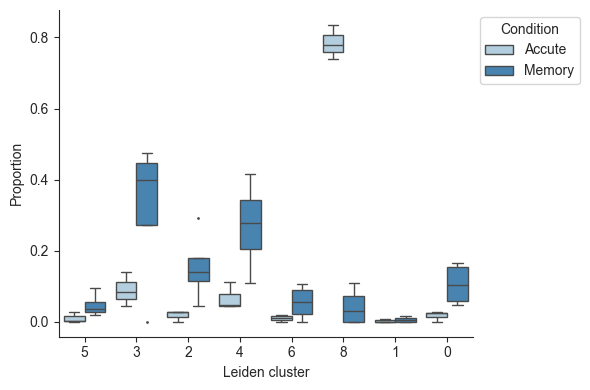

In [30]:
plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='Condition')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Leiden cluster')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_2g_accute_vs_memory_across_timepoints_woA07.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_2g_accute_vs_memory_across_timepoints_woA07.png', bbox_inches='tight', dpi=DPI)
plt.show()

In [31]:
model = mod.CompositionalAnalysis(ad_tmp, formula="C(Condition, Treatment('Memory'))")
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

Automatic reference selection! Reference cell type set to 4
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:01<00:00, 323.14it/s]


MCMC sampling finished. (100.180 sec)
Acceptance rate: 60.9%
Covariate                                    Cell Type
C(Condition, Treatment('Memory'))[T.Accute]  5            False
                                             3            False
                                             2            False
                                             4            False
                                             6            False
                                             8             True
                                             1            False
                                             0            False
Name: Final Parameter, dtype: bool
Compositional Analysis summary:

Data: 7 samples, 8 cell types
Reference index: 3
Formula: C(Condition, Treatment('Memory'))

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
5                    0.741         4.229077
3                    2.999        40.446648
2                    2.

## Replicate == Time points,   Per Epitope

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21784\2752165982.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


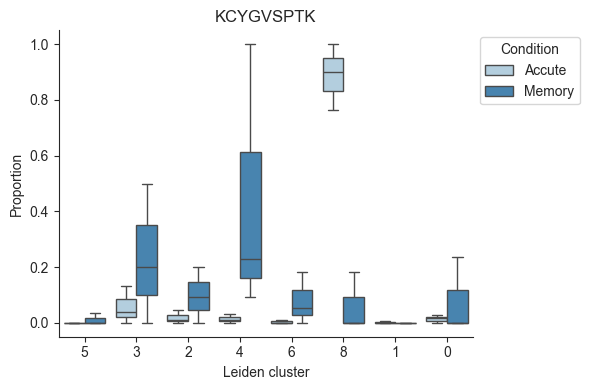

Automatic reference selection! Reference cell type set to 1
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:24<00:00, 235.79it/s]


MCMC sampling finished. (105.636 sec)
Acceptance rate: 56.1%
##############################
KCYGVSPTK
Covariate                                    Cell Type
C(Condition, Treatment('Memory'))[T.Accute]  5            False
                                             3            False
                                             2            False
                                             4            False
                                             6            False
                                             8             True
                                             1            False
                                             0            False
Name: Final Parameter, dtype: bool
Compositional Analysis summary:

Data: 6 samples, 8 cell types
Reference index: 6
Formula: C(Condition, Treatment('Memory'))

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
5                    0.504         2.630450
3                    2.561

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21784\2752165982.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


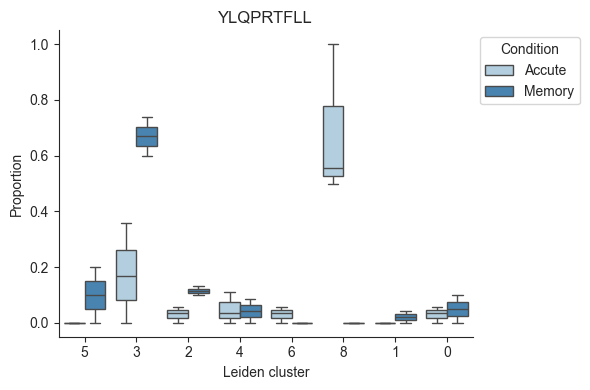

Automatic reference selection! Reference cell type set to 6
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:18<00:00, 253.18it/s]


MCMC sampling finished. (98.794 sec)
Acceptance rate: 59.6%
##############################
YLQPRTFLL
Covariate                                    Cell Type
C(Condition, Treatment('Memory'))[T.Accute]  5            False
                                             3            False
                                             2            False
                                             4            False
                                             6            False
                                             8             True
                                             1            False
                                             0            False
Name: Final Parameter, dtype: bool
Compositional Analysis summary:

Data: 5 samples, 8 cell types
Reference index: 4
Formula: C(Condition, Treatment('Memory'))

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
5                    2.478         1.103562
3                    4.859 

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21784\2752165982.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


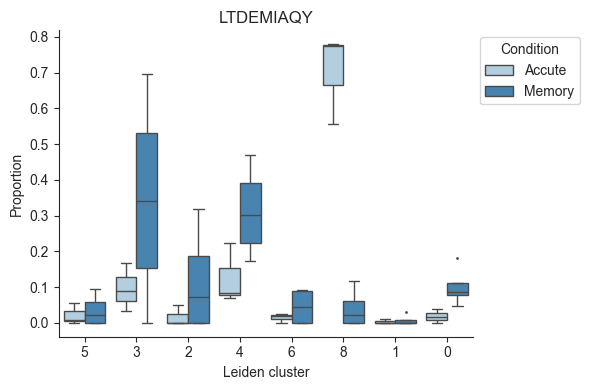

Automatic reference selection! Reference cell type set to 1
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:22<00:00, 242.84it/s]


MCMC sampling finished. (103.056 sec)
Acceptance rate: 66.1%
##############################
LTDEMIAQY
Covariate                                    Cell Type
C(Condition, Treatment('Memory'))[T.Accute]  5            False
                                             3            False
                                             2            False
                                             4            False
                                             6            False
                                             8             True
                                             1            False
                                             0            False
Name: Final Parameter, dtype: bool
Compositional Analysis summary:

Data: 7 samples, 8 cell types
Reference index: 6
Formula: C(Condition, Treatment('Memory'))

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
5                    0.730         2.191829
3                    2.587

In [32]:
for e in df_2g['binding_ct'].unique():
    df_tmp = df_2g[df_2g['binding_ct']==e].groupby(['Condition', 'time'])['leiden_CD8'].value_counts().unstack()
    df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
    df_tmp.columns.name = None

    ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['Condition', 'time'])
    ad_tmp = ad_tmp[:, [el for el in leiden_dpt_order if el in ad_tmp.var_names]].copy()

    plt.rcParams['figure.figsize'] = (6, 4) 
    ax = viz.boxplots(ad_tmp, feature_name='Condition')
    sb.despine(ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_xlabel('Leiden cluster')
    ax.set_title(e)

    plt.tight_layout()
    plt.savefig(f'{path_rev}/scCoda_2g_accute_vs_memory_across_timepoints_{e}_woA07.pdf', bbox_inches='tight', dpi=DPI)
    plt.savefig(f'{path_rev}/scCoda_2g_accute_vs_memory_across_timepoints_{e}_woA07.png', bbox_inches='tight', dpi=DPI)
    plt.show()

    model = mod.CompositionalAnalysis(ad_tmp, formula="C(Condition, Treatment('Memory'))",
                                     automatic_reference_absence_threshold=1)
    sim_results = model.sample_hmc()
    print('#'*30)
    print(e)
    print(sim_results.credible_effects())
    print(sim_results.summary())

## Replicate == Time points + Epitope

In [33]:
df_tmp = df_2g.groupby(['Condition', 'time', 'binding_ct'])['leiden_CD8'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['Condition', 'time', 'binding_ct'])
ad_tmp = ad_tmp[:, [el for el in leiden_dpt_order if el in ad_tmp.var_names]].copy()
#ad_tmp.obs

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21784\2993691220.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


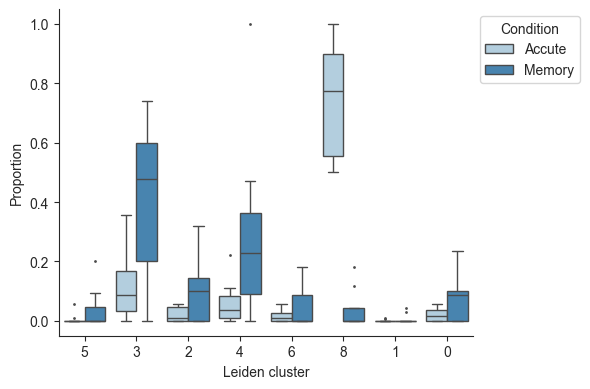

In [34]:
plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='Condition')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Leiden cluster')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_2g_accute_vs_memory_across_timepoints+epitopes_woA07.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_2g_accute_vs_memory_across_timepoints+epitopes_woA07.png', bbox_inches='tight', dpi=DPI)
plt.show()

In [35]:
model = mod.CompositionalAnalysis(ad_tmp, formula="C(Condition, Treatment('Memory'))",
                                 automatic_reference_absence_threshold=1)
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

Automatic reference selection! Reference cell type set to 1
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:24<00:00, 235.75it/s]


MCMC sampling finished. (105.285 sec)
Acceptance rate: 72.2%
Covariate                                    Cell Type
C(Condition, Treatment('Memory'))[T.Accute]  5            False
                                             3            False
                                             2            False
                                             4            False
                                             6            False
                                             8             True
                                             1            False
                                             0            False
Name: Final Parameter, dtype: bool
Compositional Analysis summary:

Data: 18 samples, 8 cell types
Reference index: 6
Formula: C(Condition, Treatment('Memory'))

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
5                    0.413         2.488859
3                    2.268        15.908039
2                    1

# Replicate == Epitope

In [36]:
df_tmp = df_2g.groupby(['Condition', 'binding_ct'])['leiden_CD8'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['Condition', 'binding_ct'])
ad_tmp = ad_tmp[:, [el for el in leiden_dpt_order if el in ad_tmp.var_names]].copy()

ad_tmp

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 6 × 8
    obs: 'Condition', 'binding_ct'

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21784\1814268004.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


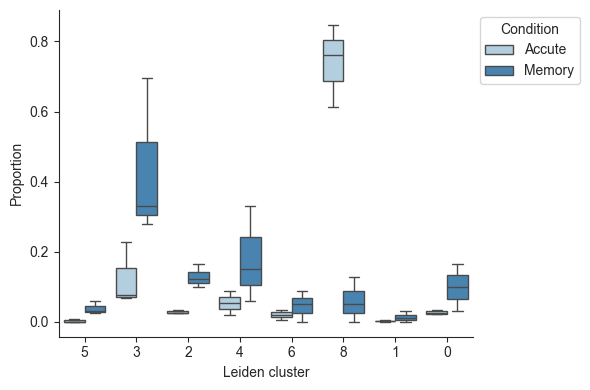

In [37]:
plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='Condition')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Leiden cluster')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_2g_accute_vs_memory_across_epitopes_woA07.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_2g_accute_vs_memory_across_epitopes_woA07.png', bbox_inches='tight', dpi=DPI)
plt.show()

In [38]:
model = mod.CompositionalAnalysis(ad_tmp, formula="C(Condition, Treatment('Memory'))",
                                 automatic_reference_absence_threshold=1)
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

Automatic reference selection! Reference cell type set to 1
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:24<00:00, 237.93it/s]


MCMC sampling finished. (102.882 sec)
Acceptance rate: 47.0%
Covariate                                    Cell Type
C(Condition, Treatment('Memory'))[T.Accute]  5            False
                                             3            False
                                             2            False
                                             4            False
                                             6            False
                                             8             True
                                             1            False
                                             0            False
Name: Final Parameter, dtype: bool
Compositional Analysis summary:

Data: 6 samples, 8 cell types
Reference index: 6
Formula: C(Condition, Treatment('Memory'))

Intercepts:
           Final Parameter  Expected Sample
Cell Type                                  
5                    0.501         4.987925
3                    2.862        52.879724
2                    1.

# Fig 3F

In [5]:
path_3f = '../../results/dextramer/CD8/revision/fig3F_scCoda.csv'
df_3f = pd.read_csv(path_3f, index_col=0)
df_3f['Condition'] = df_3f['time'].apply(lambda x: 'Accute' if x[-1] == '1' else 'Memory')
df_3f['Condition'].value_counts()

Condition
Accute    228
Memory     99
Name: count, dtype: int64

In [66]:
df_3f['binding_ct'].value_counts()

binding_ct
LTDEMIAQY    327
Name: count, dtype: int64

In [67]:
df_3f['detection_pattern_full'].value_counts()

detection_pattern_full
persisting    229
early          53
late           45
Name: count, dtype: int64

In [10]:
palette_leiden_int = {
    0: '#1f77b4',
    1: '#ff7f0e',
    2: '#279e68',
    3: '#d62728',
    4: '#aa40fc',
    5: '#8c564b',
    6: '#e377c2',
    7: '#b5bd61',
    8: '#17becf',
    9: '#aec7e8',
    10: '#ffbb78',
    11: '#98df8a',
    12: '#ff9896'
}

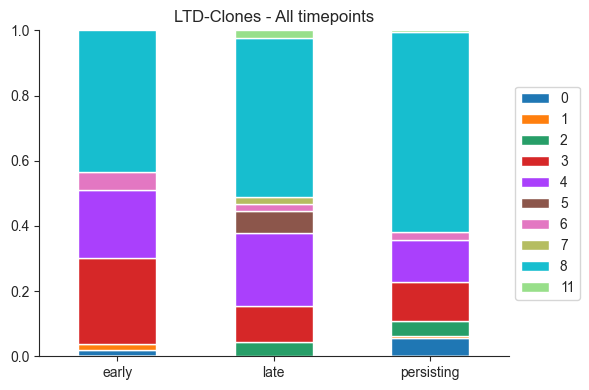

In [69]:

df_tmp = df_3f.groupby('detection_pattern_full')['leiden_CD8'].value_counts(normalize=True).unstack().fillna(0)
plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1], color=palette_leiden_int)
sb.despine(ax=plot)
plot.set_title('LTD-Clones - All timepoints')
plot.grid(False)
plot.set_xlabel(None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_cluster_by_detection_pooled_time.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_cluster_by_detection_pooled_time.png', bbox_inches='tight', dpi=DPI)
plt.show()

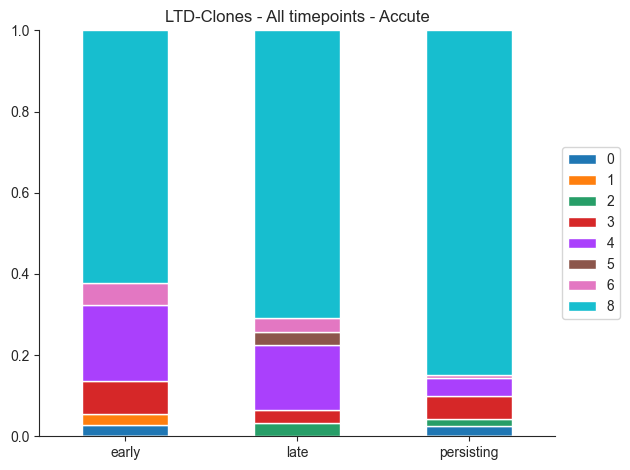

In [12]:
df_tmp = df_3f[df_3f['time'].isin(['P1', 'S1', 'T1'])]
df_tmp = df_tmp.groupby('detection_pattern_full')['leiden_CD8'].value_counts(normalize=True).unstack().fillna(0)
plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1], color=palette_leiden_int)
sb.despine(ax=plot)
plot.set_title('LTD-Clones - All timepoints - Accute')
plot.grid(False)
plot.set_xlabel(None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_cluster_by_detection_pooled_time_accute.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_cluster_by_detection_pooled_time_accute.png', bbox_inches='tight', dpi=DPI)
plt.show()

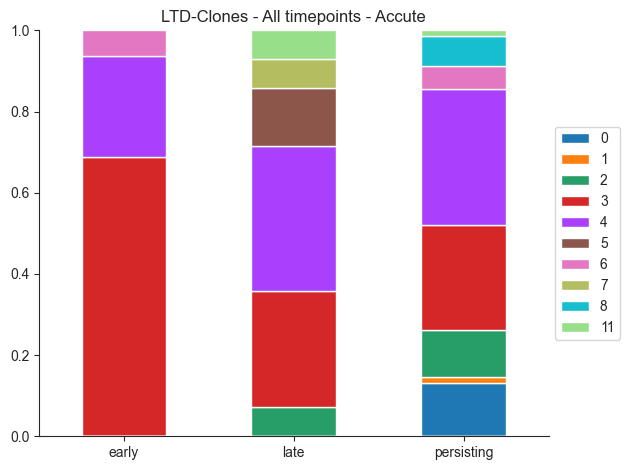

In [13]:
df_tmp = df_3f[~df_3f['time'].isin(['P1', 'S1', 'T1'])]
df_tmp = df_tmp.groupby('detection_pattern_full')['leiden_CD8'].value_counts(normalize=True).unstack().fillna(0)
plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1], color=palette_leiden_int)
sb.despine(ax=plot)
plot.set_title('LTD-Clones - All timepoints - Accute')
plot.grid(False)
plot.set_xlabel(None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_cluster_by_detection_pooled_time_memory.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_cluster_by_detection_pooled_time_memory.png', bbox_inches='tight', dpi=DPI)
plt.show()

In [16]:
df_3f['donor'].value_counts()

donor
A08    170
A04     79
A15     78
Name: count, dtype: int64

In [ ]:
df_tmp = df_3f.groupby('detection_pattern_full')['leiden_CD8'].value_counts(normalize=True).unstack().fillna(0)
plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1], color=palette_leiden_int)
sb.despine(ax=plot)
plot.set_title('LTD-Clones - All timepoints')
plot.grid(False)
plot.set_xlabel(None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_cluster_by_detection_pooled_time.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_cluster_by_detection_pooled_time.png', bbox_inches='tight', dpi=DPI)
plt.show()

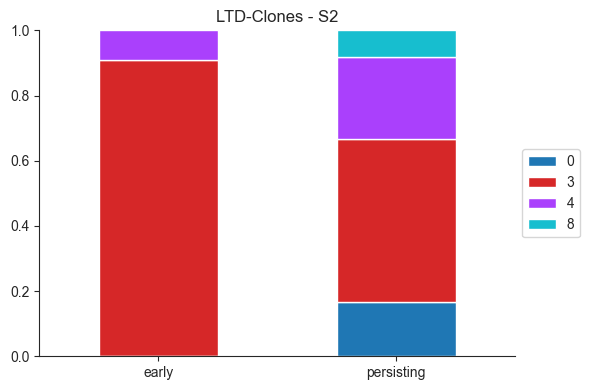

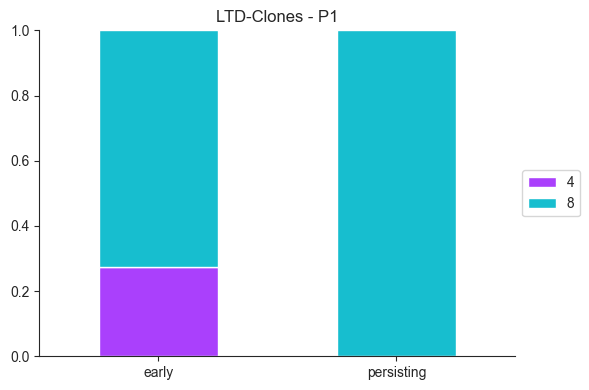

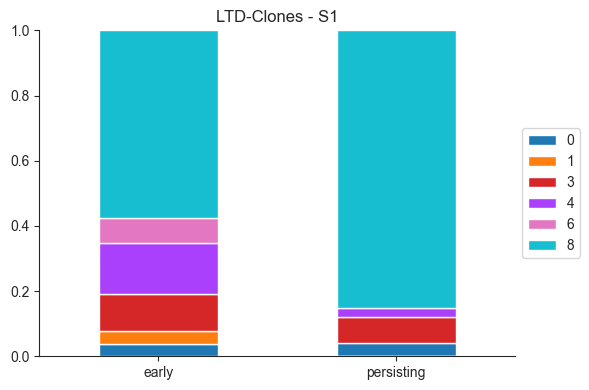

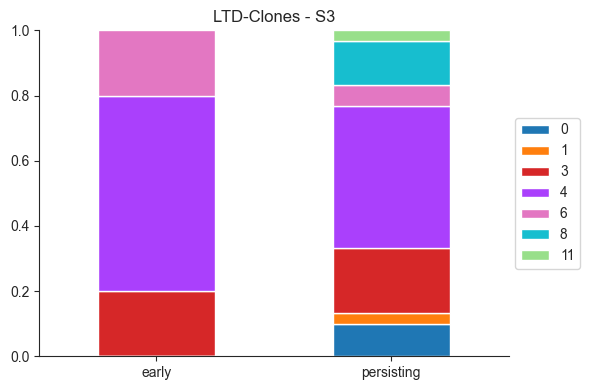

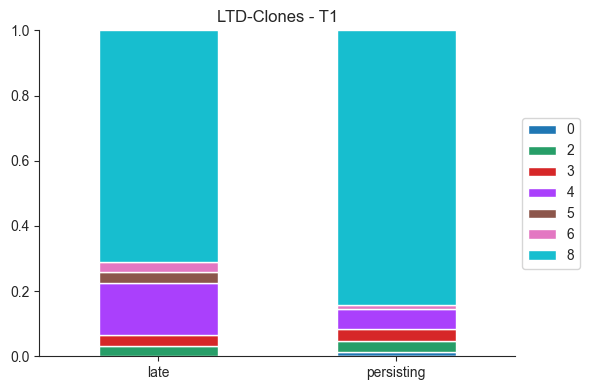

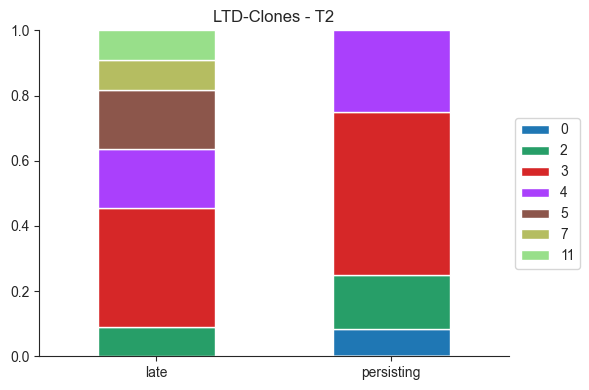

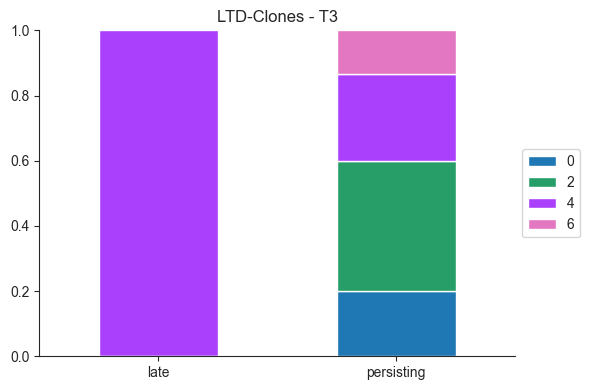

In [70]:
for t in df_3f['time'].unique():
    df_tmp = df_3f[df_3f['time']==t].groupby('detection_pattern_full')['leiden_CD8'
                                                                      ].value_counts(normalize=True).unstack().fillna(0)
    plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1], color=palette_leiden_int)
    sb.despine(ax=plot)
    plot.set_title(f'LTD-Clones - {t}')
    plot.grid(False)
    plot.set_xlabel(None)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
    plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.savefig(f'{path_rev}/scCoda_3f_cluster_by_detection_{t}.pdf', bbox_inches='tight', dpi=DPI)
    plt.savefig(f'{path_rev}/scCoda_3f_cluster_by_detection_{t}.png', bbox_inches='tight', dpi=DPI)
    plt.show()

### Replicate = Time point

In [71]:
df_tmp = df_3f.groupby(['leiden_CD8', 'time'])['detection_pattern_full'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['leiden_CD8', 'time'])
ad_tmp.obs['leiden_CD8'] = ad_tmp.obs['leiden_CD8'].astype(str)

ad_tmp

AnnData object with n_obs × n_vars = 37 × 3
    obs: 'leiden_CD8', 'time'

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21044\576864099.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


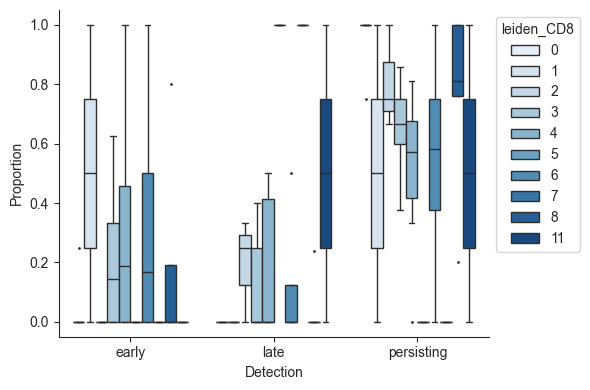

In [72]:
plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='leiden_CD8')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Detection')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_cluster_pooled_time.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_cluster_pooled_time.png', bbox_inches='tight', dpi=DPI)
plt.show()

In [73]:
model = mod.CompositionalAnalysis(ad_tmp, formula="C(leiden_CD8)",
                                 automatic_reference_absence_threshold=1)
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

Automatic reference selection! Reference cell type set to persisting
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:10<00:00, 282.11it/s]


MCMC sampling finished. (89.675 sec)
Acceptance rate: 43.0%
Covariate            Cell Type 
C(leiden_CD8)[T.1]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.11]  early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.2]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.3]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.4]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.5]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.6]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.7]   early         False
      

### Replicate == Donor

In [74]:
df_tmp = df_3f.groupby(['leiden_CD8', 'donor'])['detection_pattern_full'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['leiden_CD8', 'donor'])
ad_tmp.obs['leiden_CD8'] = ad_tmp.obs['leiden_CD8'].astype(str)

ad_tmp

AnnData object with n_obs × n_vars = 23 × 3
    obs: 'leiden_CD8', 'donor'

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21044\2940157535.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


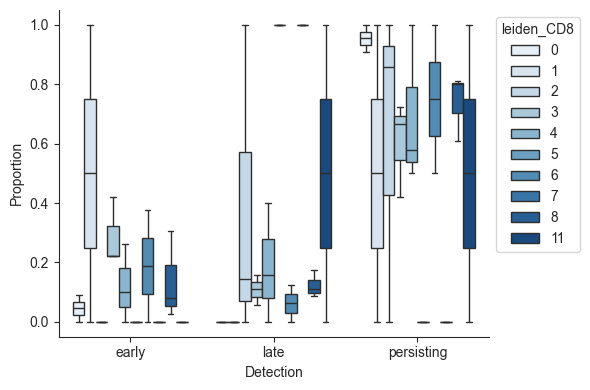

In [75]:
plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='leiden_CD8')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Detection')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_cluster_per_donor.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_cluster_per_donor.png', bbox_inches='tight', dpi=DPI)
plt.show()

In [76]:
model = mod.CompositionalAnalysis(ad_tmp, formula="C(leiden_CD8)",
                                 automatic_reference_absence_threshold=1)
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

Automatic reference selection! Reference cell type set to persisting
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:12<00:00, 277.41it/s]


MCMC sampling finished. (92.196 sec)
Acceptance rate: 34.7%
Covariate            Cell Type 
C(leiden_CD8)[T.1]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.11]  early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.2]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.3]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.4]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.5]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.6]   early         False
                     late          False
                     persisting    False
C(leiden_CD8)[T.7]   early         False
      

## Detection over leiden

### Replicate == time point

In [77]:
df_tmp = df_3f.groupby(['detection_pattern_full', 'time'])['leiden_CD8'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['detection_pattern_full', 'time'])

ad_tmp

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 14 × 10
    obs: 'detection_pattern_full', 'time'

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21044\157954544.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


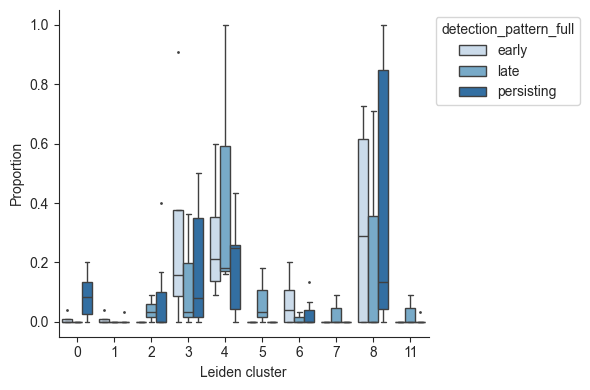

In [78]:
plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='detection_pattern_full')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Leiden cluster')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_cluster_vs_detection_pooled_time.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_cluster_vs_detection_pooled_time.png', bbox_inches='tight', dpi=DPI)
plt.show()

In [79]:
model = mod.CompositionalAnalysis(ad_tmp, formula="C(detection_pattern_full)",
                                 automatic_reference_absence_threshold=1)
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

Automatic reference selection! Reference cell type set to 1
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:36<00:00, 206.54it/s]


MCMC sampling finished. (118.993 sec)
Acceptance rate: 39.4%
Covariate                                Cell Type
C(detection_pattern_full)[T.late]        0            False
                                         1            False
                                         2            False
                                         3            False
                                         4            False
                                         5            False
                                         6            False
                                         7            False
                                         8            False
                                         11           False
C(detection_pattern_full)[T.persisting]  0            False
                                         1            False
                                         2            False
                                         3            False
                                         4      

### Replicate == Donor

In [80]:
df_tmp = df_3f.groupby(['detection_pattern_full', 'donor'])['leiden_CD8'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['detection_pattern_full', 'donor'])

ad_tmp

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\anndata\_core\anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 9 × 10
    obs: 'detection_pattern_full', 'donor'

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21044\571577323.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


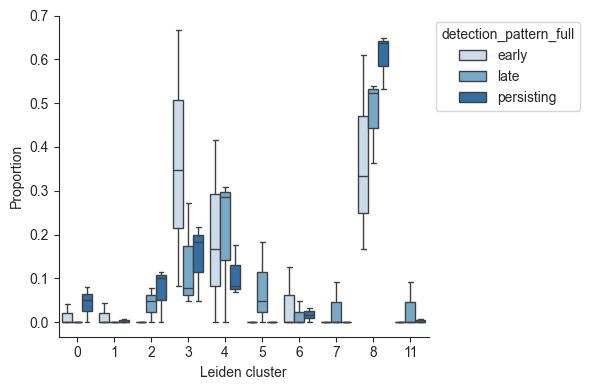

In [81]:
plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='detection_pattern_full')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Leiden cluster')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_cluster_vs_detection_per_donor.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_cluster_vs_detection_per_donor.png', bbox_inches='tight', dpi=DPI)
plt.show()

In [82]:
model = mod.CompositionalAnalysis(ad_tmp, formula="C(detection_pattern_full)",
                                 automatic_reference_absence_threshold=1)
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

Automatic reference selection! Reference cell type set to 1
Zero counts encountered in data! Added a pseudocount of 0.5.


100%|██████████| 20000/20000 [01:20<00:00, 249.02it/s]


MCMC sampling finished. (98.687 sec)
Acceptance rate: 65.7%
Covariate                                Cell Type
C(detection_pattern_full)[T.late]        0            False
                                         1            False
                                         2            False
                                         3            False
                                         4            False
                                         5            False
                                         6            False
                                         7            False
                                         8            False
                                         11           False
C(detection_pattern_full)[T.persisting]  0            False
                                         1            False
                                         2            False
                                         3            False
                                         4       

In [6]:
palette_dectection = {
    'early': 'tab:blue',
    'late': 'tab:orange',
    'persisting': 'tab:green',
}

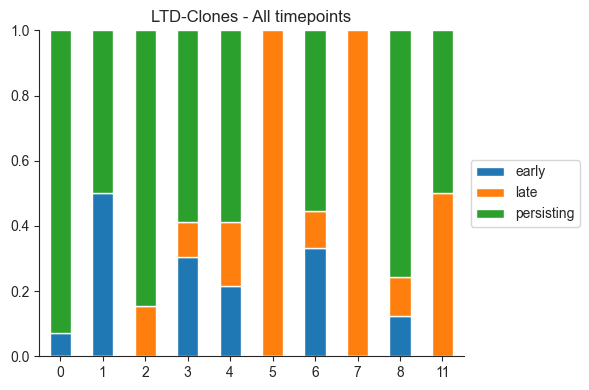

In [84]:
df_tmp = df_3f.groupby('leiden_CD8')['detection_pattern_full'].value_counts(normalize=True).unstack().fillna(0)
plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1], color=palette_dectection)
sb.despine(ax=plot)
plot.set_title('LTD-Clones - All timepoints')
plot.grid(False)
plot.set_xlabel(None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_detection_by_cluster_pooled_time.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_detection_by_cluster_pooled_time.png', bbox_inches='tight', dpi=DPI)
plt.show()

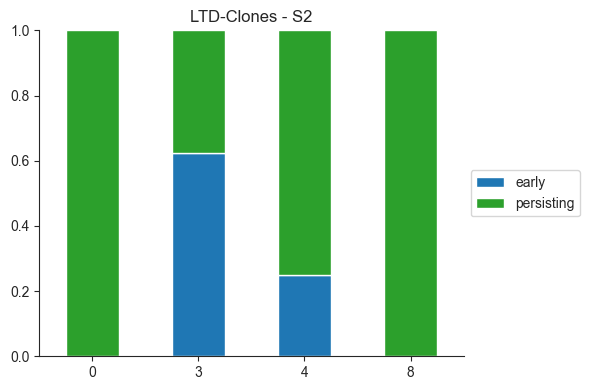

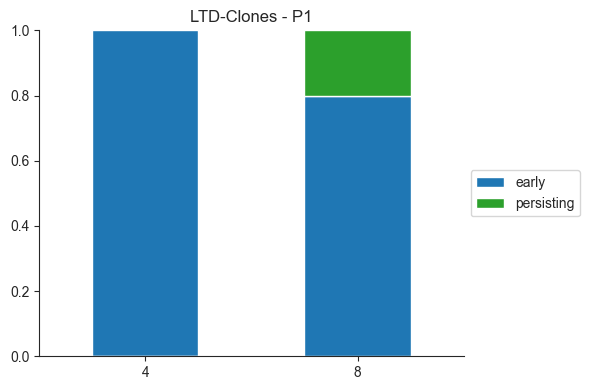

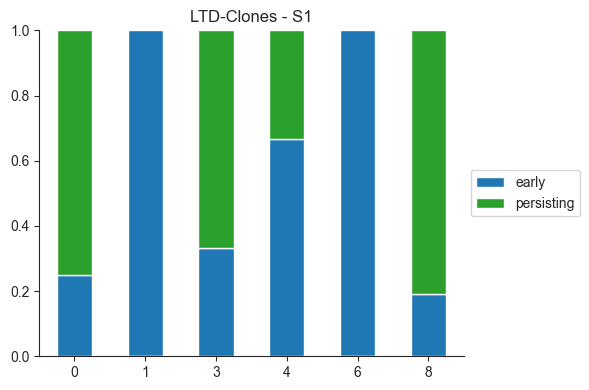

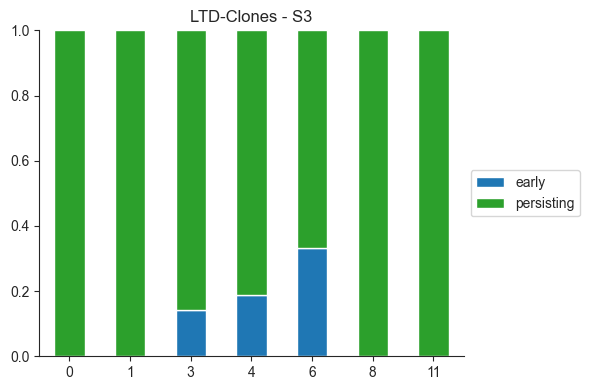

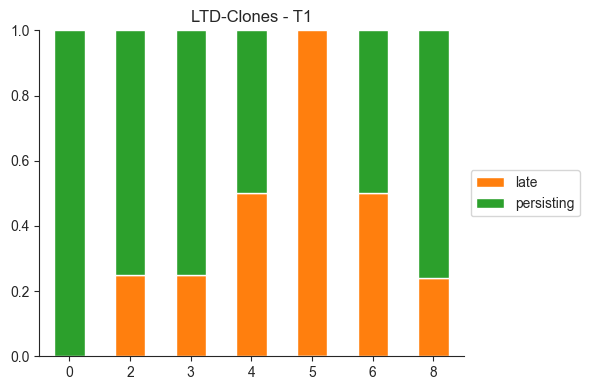

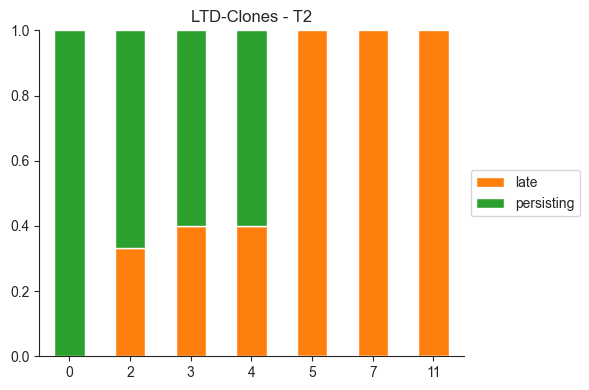

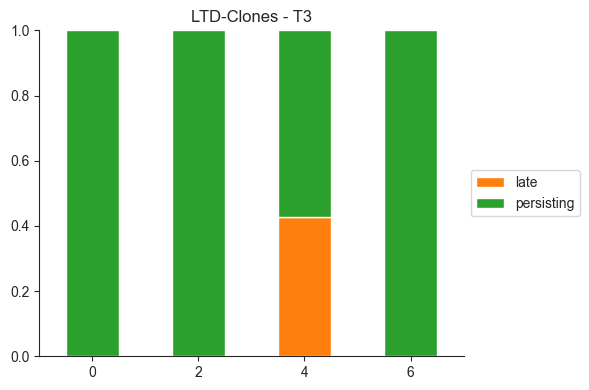

In [85]:
for t in df_3f['time'].unique():
    df_tmp = df_3f[df_3f['time']==t].groupby('leiden_CD8')['detection_pattern_full'
                                                                      ].value_counts(normalize=True).unstack().fillna(0)
    plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1], color=palette_dectection)
    sb.despine(ax=plot)
    plot.set_title(f'LTD-Clones - {t}')
    plot.grid(False)
    plot.set_xlabel(None)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
    plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    plt.savefig(f'{path_rev}/scCoda_3f_detection_by_cluster_{t}.pdf', bbox_inches='tight', dpi=DPI)
    plt.savefig(f'{path_rev}/scCoda_3f_detection_by_cluster_{t}.png', bbox_inches='tight', dpi=DPI)
    plt.show()

## Accute vs Memory

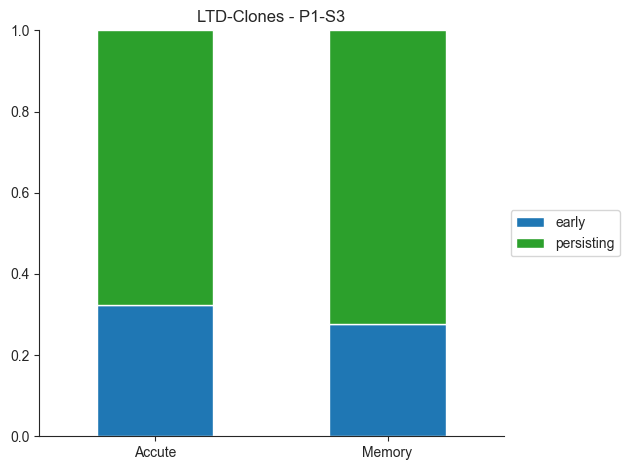

In [26]:
df_tmp = df_3f[df_3f['time'].isin(['P1', 'S1', 'S2', 'S3'])
              ].groupby('Condition')['detection_pattern_full'].value_counts(normalize=True).unstack().fillna(0)
plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1], color=palette_dectection)
sb.despine(ax=plot)
plot.set_title('LTD-Clones - P1-S3')
plot.grid(False)
plot.set_xlabel(None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_detection_by_acute_early.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_detection_by_acute_early.png', bbox_inches='tight', dpi=DPI)
plt.show()

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21044\2683704755.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


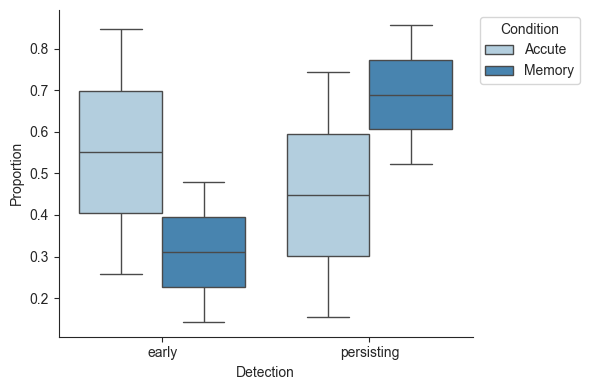

Automatic reference selection! Reference cell type set to persisting


100%|██████████| 20000/20000 [01:22<00:00, 241.92it/s]


MCMC sampling finished. (106.984 sec)
Acceptance rate: 10.1%
Covariate               Cell Type 
C(Condition)[T.Memory]  early         False
                        persisting    False
Name: Final Parameter, dtype: bool
Compositional Analysis summary:

Data: 4 samples, 2 cell types
Reference index: 1
Formula: C(Condition)

Intercepts:
            Final Parameter  Expected Sample
Cell Type                                   
early                37.410         0.085624
persisting           43.627        42.914376


Effects:
                                   Final Parameter  Expected Sample  \
Covariate              Cell Type                                      
C(Condition)[T.Memory] early                   0.0         0.085624   
                       persisting              0.0        42.914376   

                                   log2-fold change  
Covariate              Cell Type                     
C(Condition)[T.Memory] early                    0.0  
                       per

In [87]:
df_tmp = df_3f[df_3f['time'].isin(['P1', 'S1', 'S2', 'S3'])
              ].groupby(['Condition', 'time'])['detection_pattern_full'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['Condition', 'time'])

plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='Condition')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Detection')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_acute_early_per_time.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_acute_early_per_time.png', bbox_inches='tight', dpi=DPI)
plt.show()

model = mod.CompositionalAnalysis(ad_tmp, formula="C(Condition)",
                                 automatic_reference_absence_threshold=1)
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21044\3527019634.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


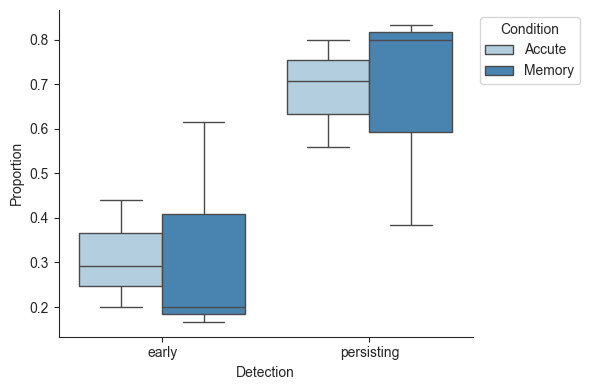

Automatic reference selection! Reference cell type set to persisting


100%|██████████| 20000/20000 [01:19<00:00, 252.85it/s]


MCMC sampling finished. (98.601 sec)
Acceptance rate: 52.6%
Covariate               Cell Type 
C(Condition)[T.Memory]  early         False
                        persisting    False
Name: Final Parameter, dtype: bool
Compositional Analysis summary:

Data: 6 samples, 2 cell types
Reference index: 1
Formula: C(Condition)

Intercepts:
            Final Parameter  Expected Sample
Cell Type                                   
early                 2.287         9.010503
persisting            3.067        19.656163


Effects:
                                   Final Parameter  Expected Sample  \
Covariate              Cell Type                                      
C(Condition)[T.Memory] early                   0.0         9.010503   
                       persisting              0.0        19.656163   

                                   log2-fold change  
Covariate              Cell Type                     
C(Condition)[T.Memory] early                    0.0  
                       pers

In [88]:
df_tmp = df_3f[df_3f['time'].isin(['P1', 'S1', 'S2', 'S3'])
              ].groupby(['Condition', 'donor'])['detection_pattern_full'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['Condition', 'donor'])

plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='Condition')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Detection')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_acute_early_per_donor.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_acute_early_per_donor.png', bbox_inches='tight', dpi=DPI)
plt.show()

model = mod.CompositionalAnalysis(ad_tmp, formula="C(Condition)",
                                 automatic_reference_absence_threshold=1)
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

### Late time Points

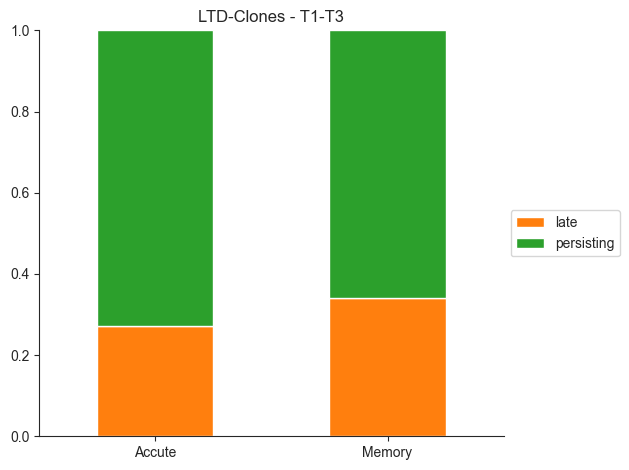

In [25]:
df_tmp = df_3f[df_3f['time'].isin(['T1', 'T2', 'T3'])
              ].groupby('Condition')['detection_pattern_full'].value_counts(normalize=True).unstack().fillna(0)
plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1], color=palette_dectection)
sb.despine(ax=plot)
plot.set_title('LTD-Clones - T1-T3')
plot.grid(False)
plot.set_xlabel(None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_detection_by_acute_late.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_detection_by_acute_late.png', bbox_inches='tight', dpi=DPI)
plt.show()

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21044\960985065.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


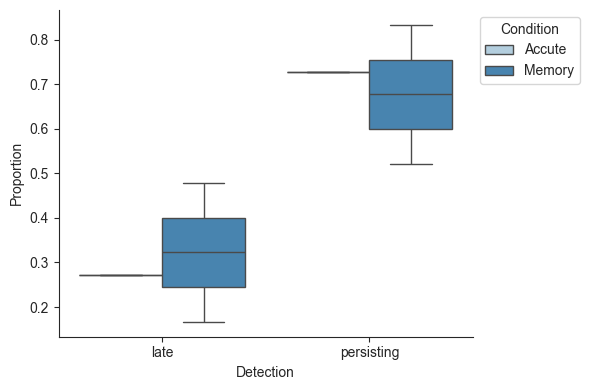

Automatic reference selection! Reference cell type set to persisting


100%|██████████| 20000/20000 [01:18<00:00, 256.34it/s]


MCMC sampling finished. (96.525 sec)
Acceptance rate: 52.6%
Covariate               Cell Type 
C(Condition)[T.Memory]  late          False
                        persisting    False
Name: Final Parameter, dtype: bool
Compositional Analysis summary:

Data: 3 samples, 2 cell types
Reference index: 1
Formula: C(Condition)

Intercepts:
            Final Parameter  Expected Sample
Cell Type                                   
late                  2.248        15.416561
persisting            3.103        36.250106


Effects:
                                   Final Parameter  Expected Sample  \
Covariate              Cell Type                                      
C(Condition)[T.Memory] late                    0.0        15.416561   
                       persisting              0.0        36.250106   

                                   log2-fold change  
Covariate              Cell Type                     
C(Condition)[T.Memory] late                     0.0  
                       pers

In [90]:
df_tmp = df_3f[df_3f['time'].isin(['T1', 'T2', 'T3'])
              ].groupby(['Condition', 'time'])['detection_pattern_full'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['Condition', 'time'])

plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='Condition')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Detection')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_acute_late_per_time.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_acute_late_per_time.png', bbox_inches='tight', dpi=DPI)
plt.show()

model = mod.CompositionalAnalysis(ad_tmp, formula="C(Condition)",
                                 automatic_reference_absence_threshold=1)
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

C:\Users\felix.drost\Anaconda3\envs\sccoda\lib\site-packages\sccoda\util\data_visualization.py:335: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cell_types, rotation=90)
C:\Users\felix.drost\AppData\Local\Temp\ipykernel_21044\2090343300.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


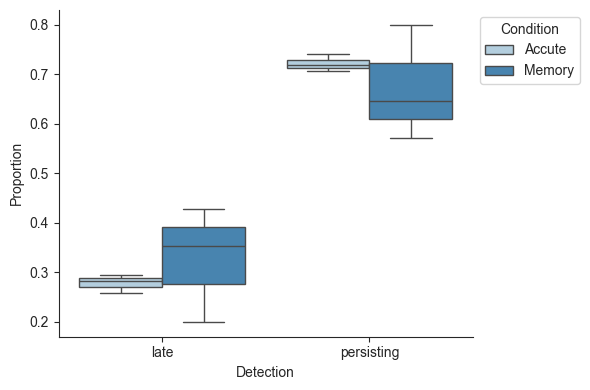

Automatic reference selection! Reference cell type set to persisting


100%|██████████| 20000/20000 [01:14<00:00, 268.46it/s]


MCMC sampling finished. (93.683 sec)
Acceptance rate: 50.8%
Covariate               Cell Type 
C(Condition)[T.Memory]  late          False
                        persisting    False
Name: Final Parameter, dtype: bool
Compositional Analysis summary:

Data: 6 samples, 2 cell types
Reference index: 1
Formula: C(Condition)

Intercepts:
            Final Parameter  Expected Sample
Cell Type                                   
late                  4.232         7.515007
persisting            5.123        18.318326


Effects:
                                   Final Parameter  Expected Sample  \
Covariate              Cell Type                                      
C(Condition)[T.Memory] late                    0.0         7.515007   
                       persisting              0.0        18.318326   

                                   log2-fold change  
Covariate              Cell Type                     
C(Condition)[T.Memory] late                     0.0  
                       pers

In [91]:
df_tmp = df_3f[df_3f['time'].isin(['T1', 'T2', 'T3'])
              ].groupby(['Condition', 'donor'])['detection_pattern_full'].value_counts().unstack()
df_tmp = df_tmp.fillna(0).reset_index().reset_index(drop=True)
df_tmp.columns.name = None

ad_tmp = dat.from_pandas(df_tmp, covariate_columns=['Condition', 'donor'])

plt.rcParams['figure.figsize'] = (6, 4) 
ax = viz.boxplots(ad_tmp, feature_name='Condition')
sb.despine(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_xlabel('Detection')

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_acute_late_per_donor.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_detection_vs_acute_late_per_donor.png', bbox_inches='tight', dpi=DPI)
plt.show()

model = mod.CompositionalAnalysis(ad_tmp, formula="C(Condition)",
                                 automatic_reference_absence_threshold=1)
sim_results = model.sample_hmc()
print(sim_results.credible_effects())
sim_results.summary()

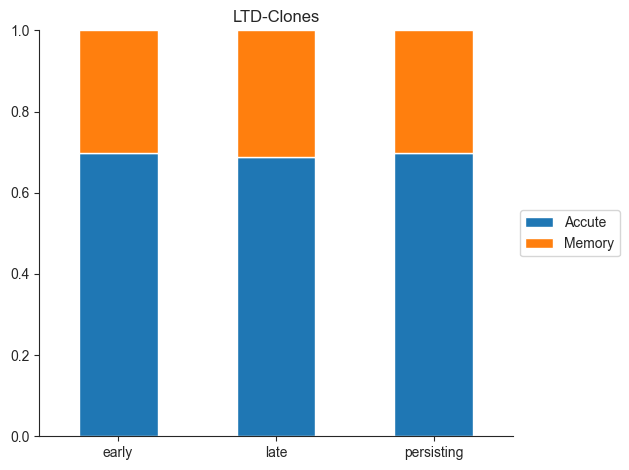

In [13]:
df_tmp = df_3f.groupby('detection_pattern_full')['Condition'].value_counts(normalize=True).unstack().fillna(0)
plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1])
sb.despine(ax=plot)
plot.set_title('LTD-Clones')
plot.grid(False)
plot.set_xlabel(None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_acute_by_detection.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_acute_by_detection.png', bbox_inches='tight', dpi=DPI)
plt.show()

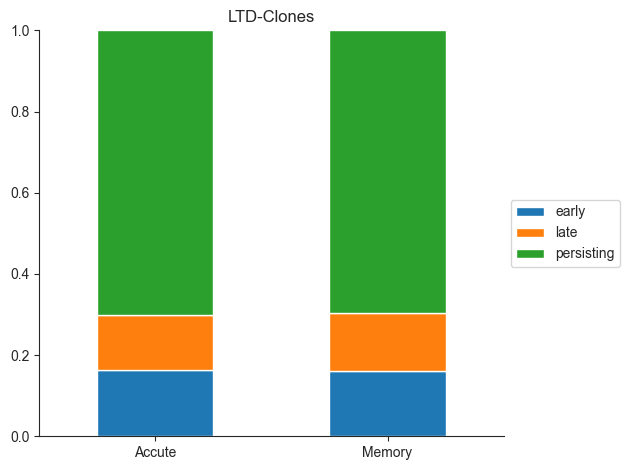

In [24]:
df_tmp = df_3f.groupby('Condition')['detection_pattern_full'].value_counts(normalize=True).unstack().fillna(0)
plot = df_tmp.plot(kind='bar', stacked=True, ylim=[0, 1])
sb.despine(ax=plot)
plot.set_title('LTD-Clones')
plot.grid(False)
plot.set_xlabel(None)
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)
plot.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig(f'{path_rev}/scCoda_3f_detection_by_acute.pdf', bbox_inches='tight', dpi=DPI)
plt.savefig(f'{path_rev}/scCoda_3f_detection_by_acute.png', bbox_inches='tight', dpi=DPI)
plt.show()

<Axes: xlabel='detection_pattern_full', ylabel='proportion'>

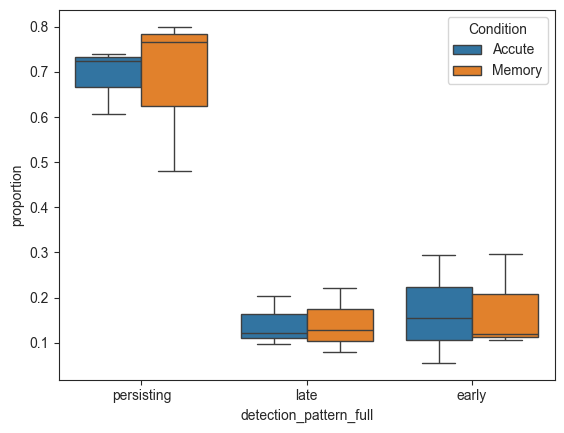

In [23]:
df_tmp = df_3f.groupby(['Condition', 'donor'])['detection_pattern_full'].value_counts(normalize=True).fillna(0).reset_index()
sb.boxplot(data=df_tmp, x='detection_pattern_full', y='proportion', hue='Condition')